In [216]:
import pandas as pd
import numpy as np

# Loading Dataset
To load the dataset, we can use the `read_csv()` function from the pandas library :

```
python
df_part1 = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv')
df_part2 = pd.read_csv('./Sleep_health_and_lifestyle_dataset_part_2.csv')
```
These two lines of code will load the dataset from the CSV files `Sleep_health_and_lifestyle_dataset.csv` and `Sleep_health_and_lifestyle_dataset_part_2.csv` respectively and store them in the variables `df_part1` and `df_part2`.


In [217]:
df_part1 = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv')
df_part2 = pd.read_csv('./Sleep_health_and_lifestyle_dataset_part_2.csv')

# Merging two parts of the dataset to create a single one

In [218]:
df = pd.concat((df_part1, df_part2))
print(df.shape)
df.head()

(560, 13)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Exploring the data set

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                560 non-null    int64  
 1   Gender                   560 non-null    object 
 2   Age                      560 non-null    int64  
 3   Occupation               560 non-null    object 
 4   Sleep Duration           560 non-null    float64
 5   Quality of Sleep         560 non-null    int64  
 6   Physical Activity Level  560 non-null    int64  
 7   Stress Level             560 non-null    int64  
 8   BMI Category             560 non-null    object 
 9   Blood Pressure           560 non-null    object 
 10  Heart Rate               560 non-null    int64  
 11  Daily Steps              560 non-null    int64  
 12  Sleep Disorder           185 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 61.2+ KB


In [220]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,280.167857,40.021429,7.115893,7.275000,58.787500,5.458929,70.178571,6821.071429
std,161.418024,8.132153,0.742655,1.134631,19.955394,1.676447,3.873247,1527.465518
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,140.750000,33.000000,6.500000,6.000000,45.000000,4.000000,68.000000,5500.000000
50%,280.500000,38.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,419.250000,44.000000,7.700000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,559.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# Dropping Irrelevant Feature Person ID

In [221]:
df.drop('Person ID', axis=1, inplace=True)

# Handling NA values  

In [222]:
df.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             375
dtype: int64

### NA values found in 'Sleep Disorder' indicates that the person doesn't have any sleep disorders, so instead of treating it as NA value we will assign 'None' to it 

In [223]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [224]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [225]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
181,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
182,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
183,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
184,Male,43,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia


## Handling the 'Blood Pressure' column by splitting it into Low BP and High BP

In [226]:
lowRow = []
highRow = []


for val in df['Blood Pressure']:
    sp = val.split('/')

    highRow.append(int(sp[0]))
    lowRow.append(int(sp[1]))

df['LowBP'] = np.array(lowRow)
df['HighBP'] = np.array(highRow)


In [227]:
df = df.drop('Blood Pressure', axis = 1)

In [228]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,LowBP,HighBP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,83,126
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,80,125
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,80,125
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,90,140
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,90,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Female,43,Teacher,6.7,7,45,4,Overweight,65,6000,Insomnia,90,135
182,Male,43,Salesperson,6.5,6,45,7,Overweight,72,6000,Insomnia,85,130
183,Female,43,Teacher,6.7,7,45,4,Overweight,65,6000,Insomnia,90,135
184,Male,43,Salesperson,6.4,6,45,7,Overweight,72,6000,Insomnia,85,130


## Using LabelEncoders to Encode the Categorical Data
#### We also store a dictionay of encoders so that we can also Transform the unseen data into the same format

In [229]:
from sklearn.preprocessing import LabelEncoder

In [230]:
catData = [key for key in df if (df[key].dtype == object)]
numData = [key for key in df if (df[key].dtype != object)]
print('categorical features are :',catData)

categorical features are : ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']


In [231]:
label_encoding_dict = {}
for category in catData:
    labelEncoder = LabelEncoder()
    labelEncoder.fit(df[category])
    df[category] = labelEncoder.transform(df[category])
    label_encoding_dict[category] = labelEncoder
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,LowBP,HighBP
0,1,27,9,6.1,6,42,6,3,77,4200,1,83,126
1,1,28,1,6.2,6,60,8,0,75,10000,1,80,125
2,1,28,1,6.2,6,60,8,0,75,10000,1,80,125
3,1,28,6,5.9,4,30,8,2,85,3000,2,90,140
4,1,28,6,5.9,4,30,8,2,85,3000,2,90,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0,43,10,6.7,7,45,4,3,65,6000,0,90,135
182,1,43,7,6.5,6,45,7,3,72,6000,0,85,130
183,0,43,10,6.7,7,45,4,3,65,6000,0,90,135
184,1,43,7,6.4,6,45,7,3,72,6000,0,85,130


# Distribution of target features

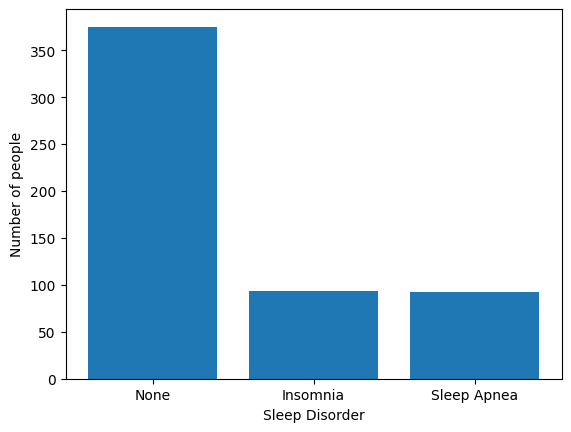

In [232]:
import matplotlib.pyplot as plt
count=df['Sleep Disorder'].value_counts()
plt.bar(label_encoding_dict['Sleep Disorder'].inverse_transform(count.keys()),count)
plt.xlabel('Sleep Disorder')
plt.ylabel('Number of people')
plt.show()

# Boxplot of Features

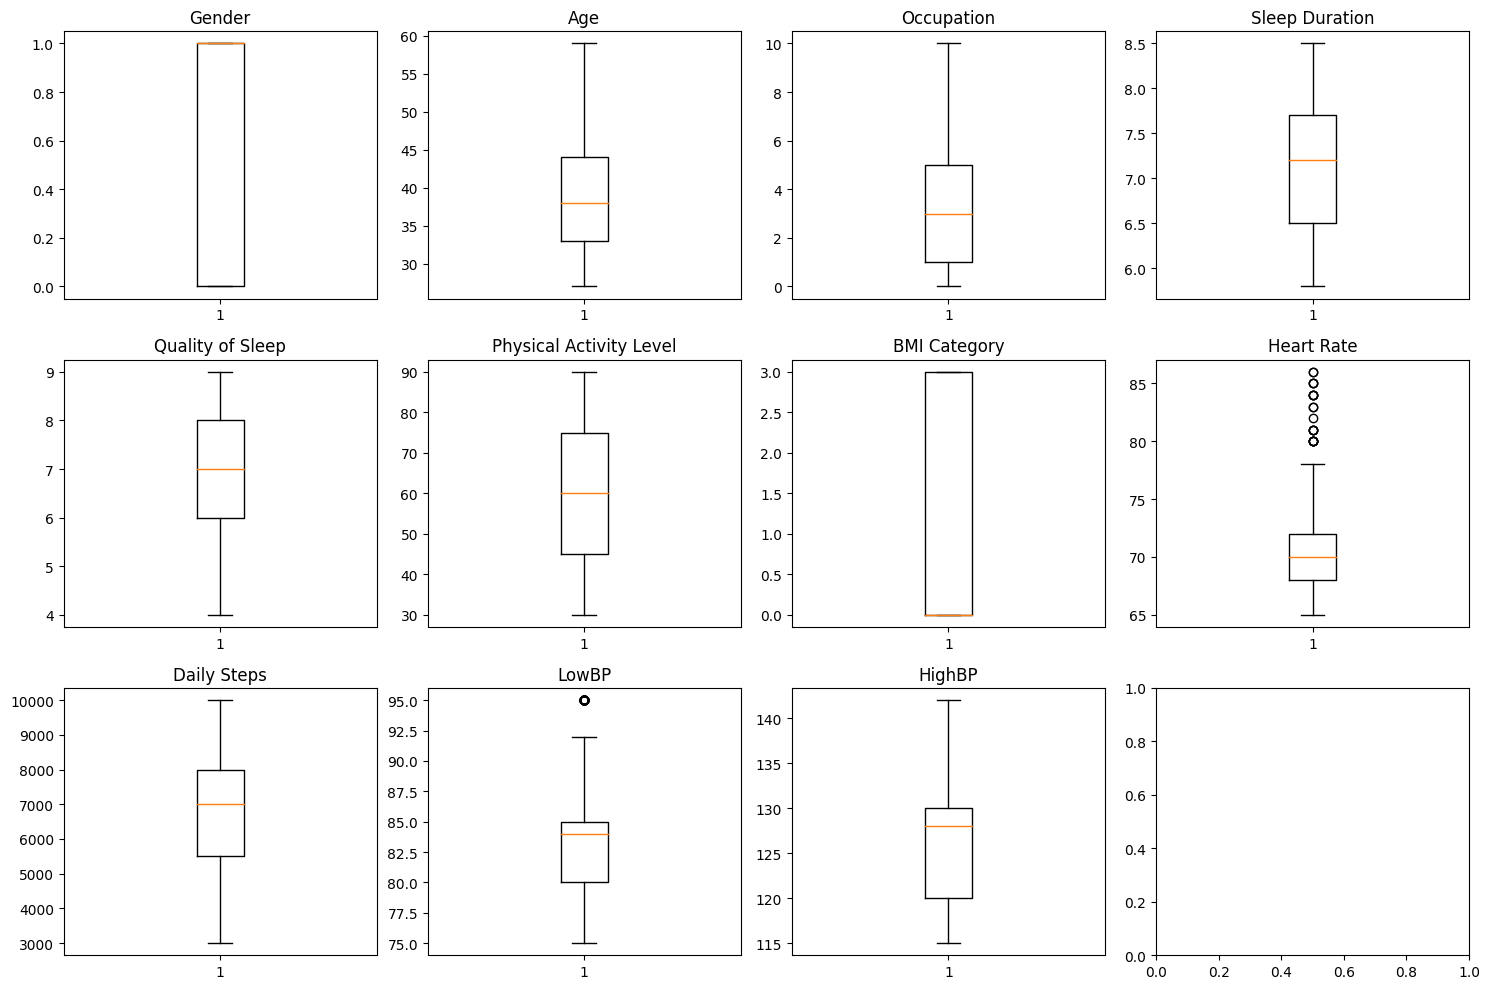

In [233]:
import matplotlib.pyplot as plt

columns = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'LowBP', 'HighBP']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for i, column in enumerate(columns):
    ax = axes[i // 4, i % 4]
    ax.boxplot(df[column])
    ax.set_title(column)

plt.tight_layout()
plt.show()

## Correlation analysis

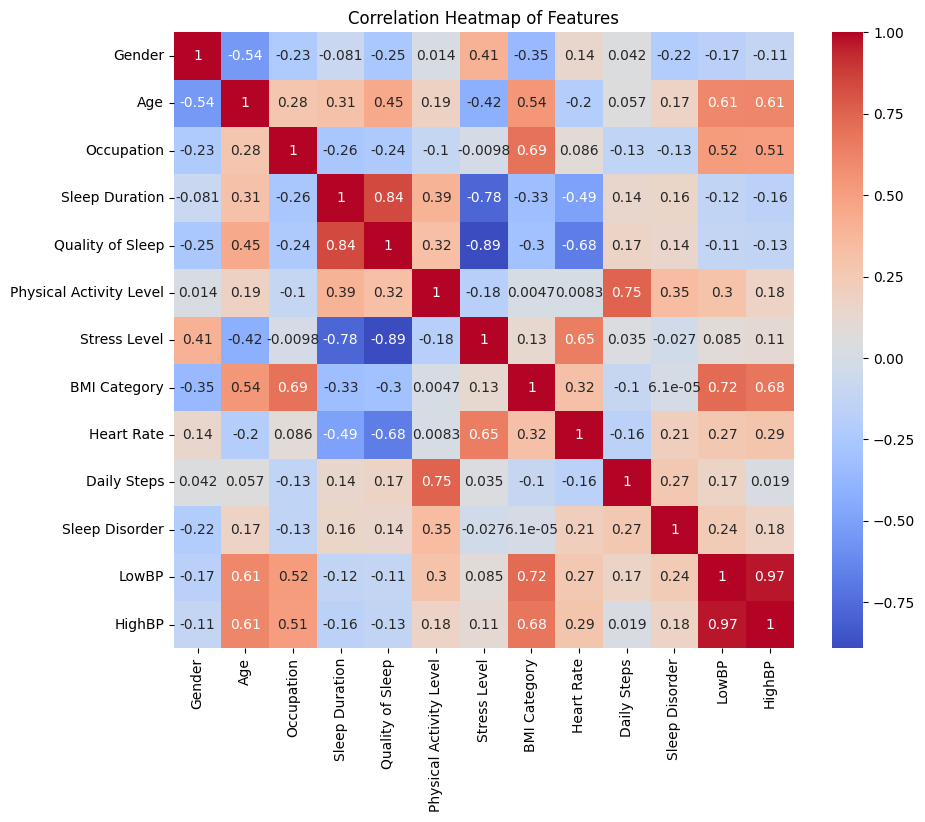

In [234]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

The correlation heatmap provides insights into the relationships between different features in the dataset

# Standardisation of Data

In [235]:
numData

['Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'LowBP',
 'HighBP']

In [236]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
for f in numData:
    df[f] = StandardScaler().fit_transform(df[[f]])
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,LowBP,HighBP
0,1,-1.602659,9,-1.369144,-1.124718,-0.842003,0.323037,3,1.762740,-1.717495,1,-0.083242,-0.131326
1,1,-1.479581,1,-1.234372,-1.124718,0.060815,1.517103,0,1.245916,2.083039,1,-0.603121,-0.263836
2,1,-1.479581,1,-1.234372,-1.124718,0.060815,1.517103,0,1.245916,2.083039,1,-0.603121,-0.263836
3,1,-1.479581,6,-1.638689,-2.888981,-1.443882,1.517103,2,3.830037,-2.503813,2,1.129807,1.723805
4,1,-1.479581,6,-1.638689,-2.888981,-1.443882,1.517103,2,3.830037,-2.503813,2,1.129807,1.723805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0,0.366598,10,-0.560509,-0.242586,-0.691534,-0.871028,3,-1.338206,-0.538019,0,1.129807,1.061258
182,1,0.366598,7,-0.830054,-1.124718,-0.691534,0.920070,3,0.470679,-0.538019,0,0.263343,0.398711
183,0,0.366598,10,-0.560509,-0.242586,-0.691534,-0.871028,3,-1.338206,-0.538019,0,1.129807,1.061258
184,1,0.366598,7,-0.964827,-1.124718,-0.691534,0.920070,3,0.470679,-0.538019,0,0.263343,0.398711
